In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('F:/NIIT/DS2_/Mini Projects/DS3_C6_S3_MallCustomers_Data_Project.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data exploration

### Data strucutre

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**no null values**

### Data distribution

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
for i in data.columns:
    print(i.ljust(25),str(data[i].dtype).ljust(10),data[i].nunique())

CustomerID                int64      200
Gender                    object     2
Age                       int64      51
Annual Income (k$)        int64      64
Spending Score (1-100)    int64      84


dropping **CustomerID** since it is unique throughout the rows

In [8]:
df=data.drop('CustomerID',axis=1)

In [9]:
# cat = list of categorical features
# con = list of continuous features

cat,con=[],[]
for i in df.columns:
    if data[i].nunique()<5:
        cat.append(i)
    else: con.append(i)
        
print('Categorical:',cat)
print('Continuous:',con)

Categorical: ['Gender']
Continuous: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [10]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print('-'*30)

Gender
Female    112
Male       88
Name: Gender, dtype: int64
------------------------------


### Categorical data distribution

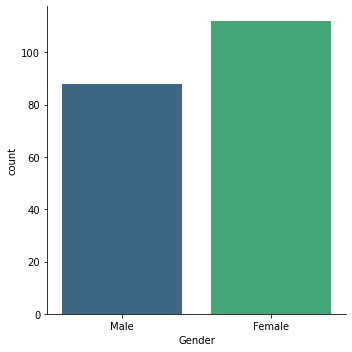

In [11]:
for i in cat:
    sns.catplot(data=df,x=i,palette='viridis',kind='count')

**OBSERVATION**:\
More Female examples than Male examples

### Continuous data distribution

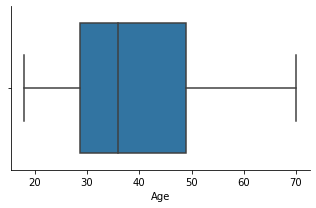

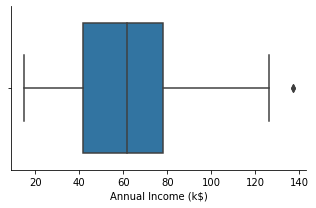

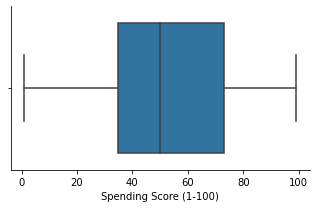

In [12]:
for i in con:
    sns.catplot(data=df,x=i,kind='box',height=3,aspect=1.5)

presence of outliers detected in Annual Income

In [13]:
df.drop(df[df['Annual Income (k$)']>130].index,axis=0,inplace=True)
df.shape

(198, 4)

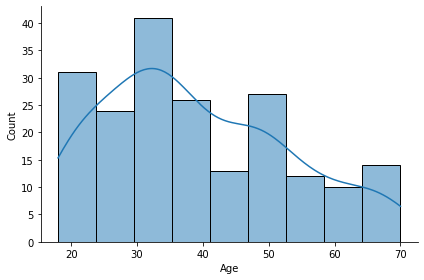

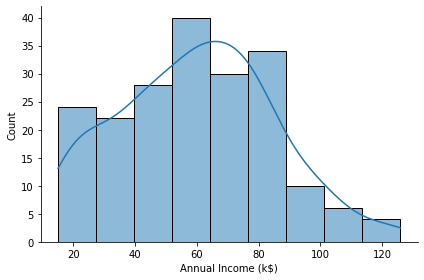

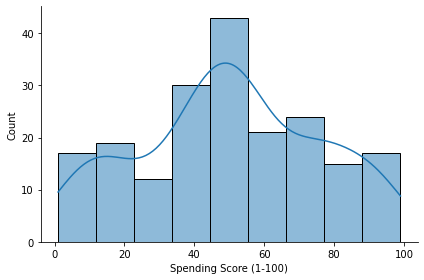

In [14]:
for i in con:
    sns.displot(data=df,x=i,kind='hist',palette='viridis',kde=1,height=4,aspect=1.5)

**OBSERVATION:**
1. Age: Highest number of shoppers in the range of **30-40 years**
2. Annual income: Highest number of shoppers in the range of **60-80k$**
3. Spending score: Highest number of shoppers around the score of **50**

### Bi-variate analysis

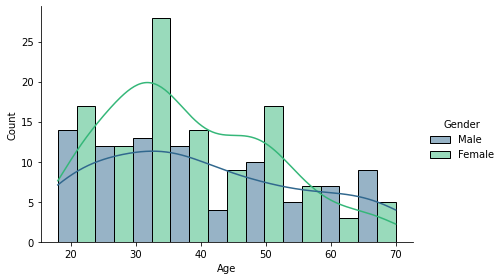

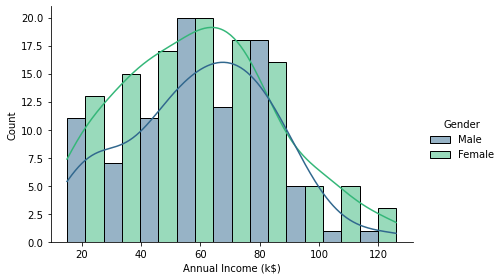

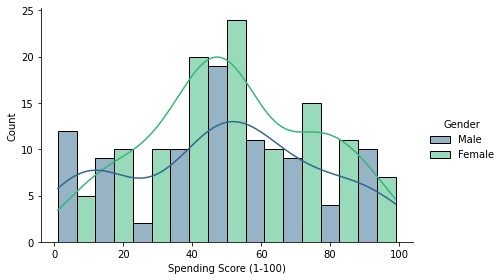

In [15]:
for i in con:
    sns.displot(data=df,x=i,kind='hist',palette='viridis',hue='Gender',multiple='dodge',kde=1,height=4,aspect=1.5)

**OBSERVATION:**
1. Age: More female shoppers than male shoppers till 60, after 60 vice-verca
2. Annual Income: More female shoppers than male shoppers throughout the distribution
3. Spending score: More female shoppers than male shoppers

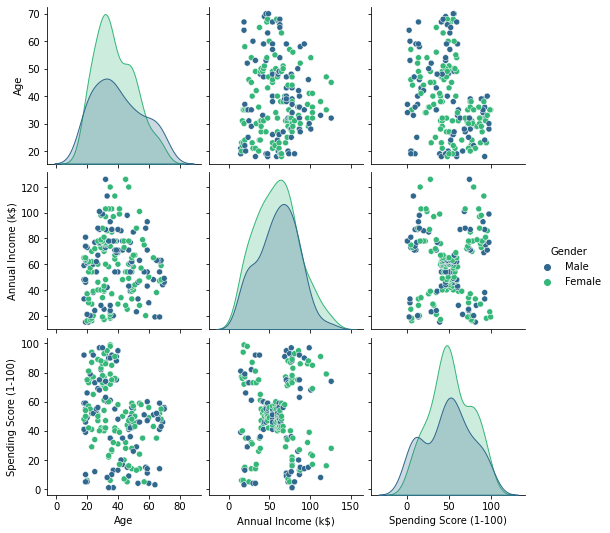

In [16]:
sns.pairplot(df,palette='viridis',hue='Gender')

**OBSERVATION:**
1. Age-Annual Income: High income is of shoppers in the range of 30-40 years
2. Age-Spending score: High spending score is achieved by shoppers till 40 years
3. Annual Income-Spending Score: Shoppers with average Annual Income have average Spending Score

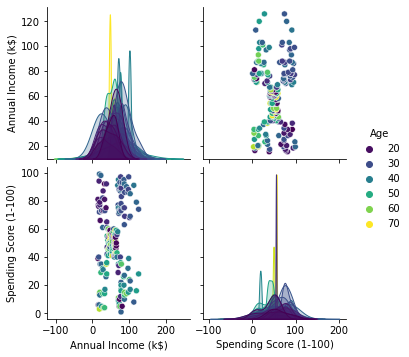

In [17]:
sns.pairplot(df,palette='viridis',hue='Age')

**OBSERVATION:**
1. High Spending Scores + high Annual Income: 20-30 years
2. Low Spending Scores + high Annual Income: 30-50 years
3. Low Spending Scores + low Annual Income: >50 years
4. High Spending Scores + low Annual Income: 20-30 years

### Multi-variate analysis

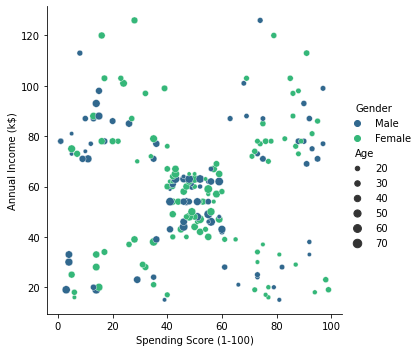

In [18]:
sns.relplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender',size='Age',palette='viridis')

**OBSERVATION:**
**No gender specific observation**
1. Average spending scores are populated by shoppers of avergae annual income who are above 40 years of age ~elderly
2. High spending scores are populated by shoppers of age less than 40 years

### Correlation Matrix

In [19]:
df.corr().style.background_gradient(cmap='Blues').set_precision(3)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,0.004,-0.329
Annual Income (k$),0.004,1.000,0.010
Spending Score (1-100),-0.329,0.010,1.000


**OBSERVATION:**\
high positive correlation is not observed\
high negative correlation is observed between **Spending Score (1-100) and Age**

# Data Preprocessing

### Feature engineering

In [20]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [21]:
from sklearn import preprocessing

In [22]:
df['Gender']=preprocessing.LabelEncoder().fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Encoding: Male = 1 and Female = 0

### Feature scaling

**Mandatory to scale the data for clustering**\
This is because statistically to cluster and visualize the data, they need to share the same metric

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
d=MinMaxScaler().fit_transform(df)
d=pd.DataFrame(d,columns=df.columns)
d.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


# Modelling

Clustering algorithms: **KMeans, AgglomerativeClustering, DBSCAN**

### KMeans

In [25]:
from sklearn.cluster import KMeans

In [26]:
# find best k using silhouette_score method
from sklearn.metrics import silhouette_score

sil_score=dict()
for i in range(2,21):
    temp=KMeans(n_clusters=i).fit(d)
    labels=temp.labels_
    sil_score[i]=silhouette_score(d,labels)
    
# best k unsing elbow method
wcss=dict()
for i in range(2,21):
    temp=KMeans(n_clusters=i).fit(d)
    wcss[i]=temp.inertia_

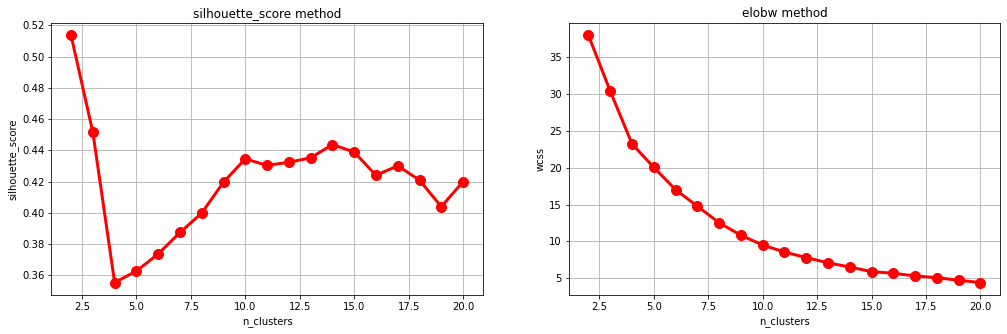

In [27]:
fig,ax=plt.subplots(1,2,figsize=(17,5))

# plotting silhouette_score vs k
ax[0].plot(sil_score.keys(),sil_score.values(),marker='o',linewidth=3,markersize=10,color='r')
ax[0].set_xlabel('n_clusters')
ax[0].set_ylabel('silhouette_score')
ax[0].set_title('silhouette_score method')  
ax[0].grid()

# plotting wcss vs k
ax[1].plot(wcss.keys(), wcss.values(),marker='o',color='r',linewidth=3, markersize=10)  
ax[1].set_xlabel('n_clusters')  
ax[1].set_ylabel('wcss')
ax[1].set_title('elobw method')  
ax[1].grid()

from silhouette_score method k=2 is best where for the same from elbow method wcss is high\
hence for the following highest k from silhouette_score method that works well with the elbow method also hence **best k = 10**

In [28]:
k=10
kmeans=KMeans(n_clusters=k,random_state=10).fit(d)
cuslter_centroid=kmeans.cluster_centers_
y_kmeans=kmeans.labels_

In [29]:
print('Silhouette score: {:.3f}'.format(silhouette_score(d,y_kmeans)))
print('Clusters:',np.unique(y_kmeans))

Silhouette score: 0.436
Clusters: [0 1 2 3 4 5 6 7 8 9]


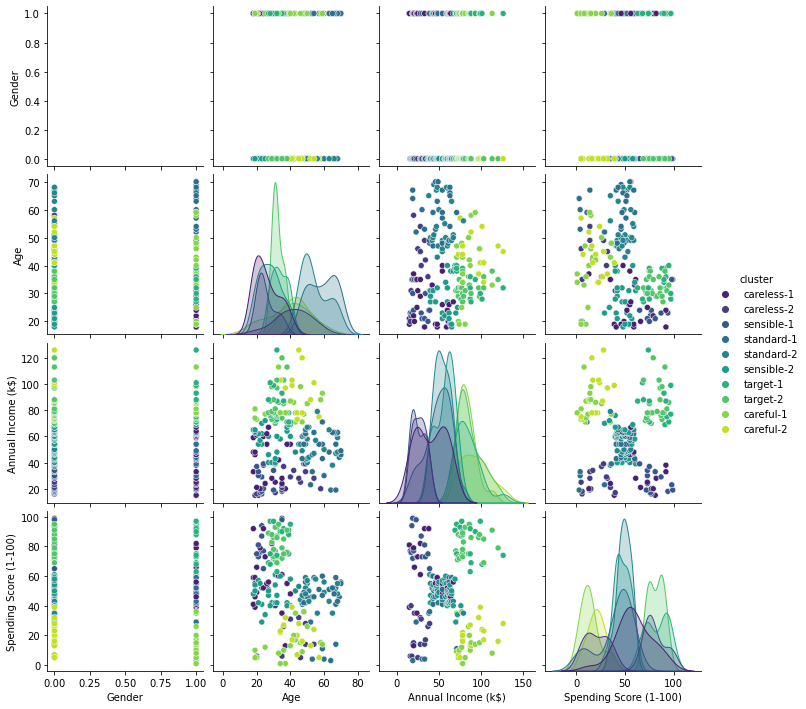

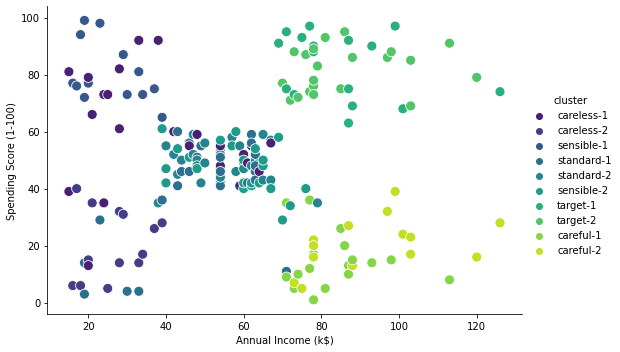

In [30]:
df['cluster']=y_kmeans
df['cluster'].replace({0:'sensible-1',1:'standard-1',2:'standard-2',3:'careless-2',
                       4:'careless-1',5:'target-1',6:'target-2',7:'careful-1',8:'careful-2',9:'sensible-2'},inplace=True)
sns.pairplot(df,hue='cluster',palette='viridis')
sns.relplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue='cluster',palette='viridis',aspect=1.5,s=100)
df.drop('cluster',axis=1,inplace=True)

Text(0, 0.5, 'Spending Score (1-100)')

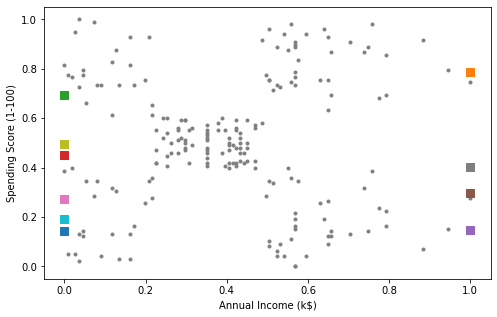

In [31]:
xax='Annual Income (k$)'
yax='Spending Score (1-100)'

plt.figure(figsize=(8,5))
plt.scatter(x=d[xax],y=d[yax],color='gray',marker='.')
for i in kmeans.cluster_centers_:
    plt.scatter(i[0],i[1], s=50, marker='s')
plt.xlabel(xax)
plt.ylabel(yax)

### Agglomerative Hirarchial Clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Text(0.5, 1.0, 'Hierarchial Dendogram\n')

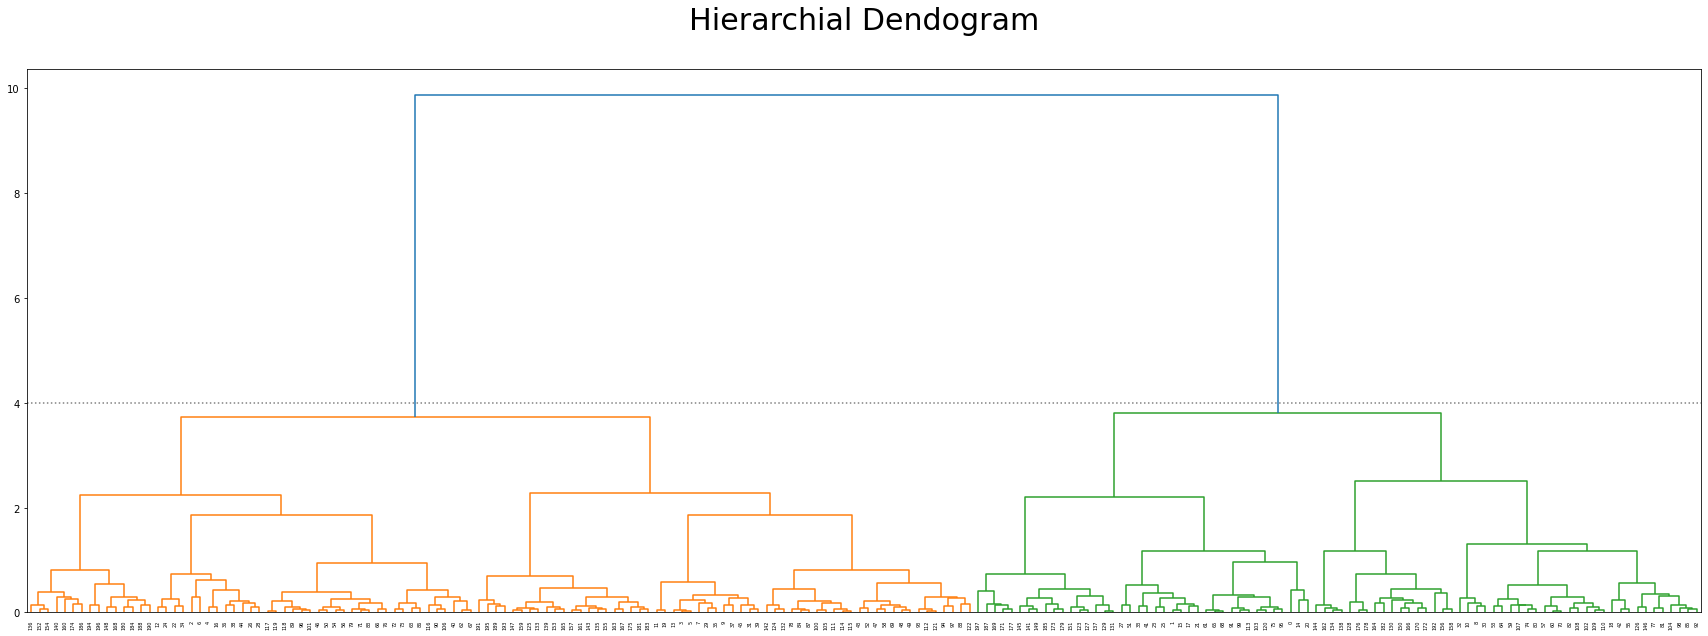

In [33]:
plt.figure(figsize=(30, 10))
sch.dendrogram(sch.linkage(d, method = 'ward'))
plt.axhline(y=4,linestyle=':',c='gray')
plt.title('Hierarchial Dendogram\n',fontsize=30)

average of 2 and 4 **n_cluster = 3**

In [34]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage = 'ward')
y_hc=hc.fit_predict(d)

In [35]:
print('Silhouette score: {:.3f}'.format(silhouette_score(d,y_hc)))
print('Clusters:',np.unique(y_hc))

Silhouette score: 0.445
Clusters: [0 1 2]


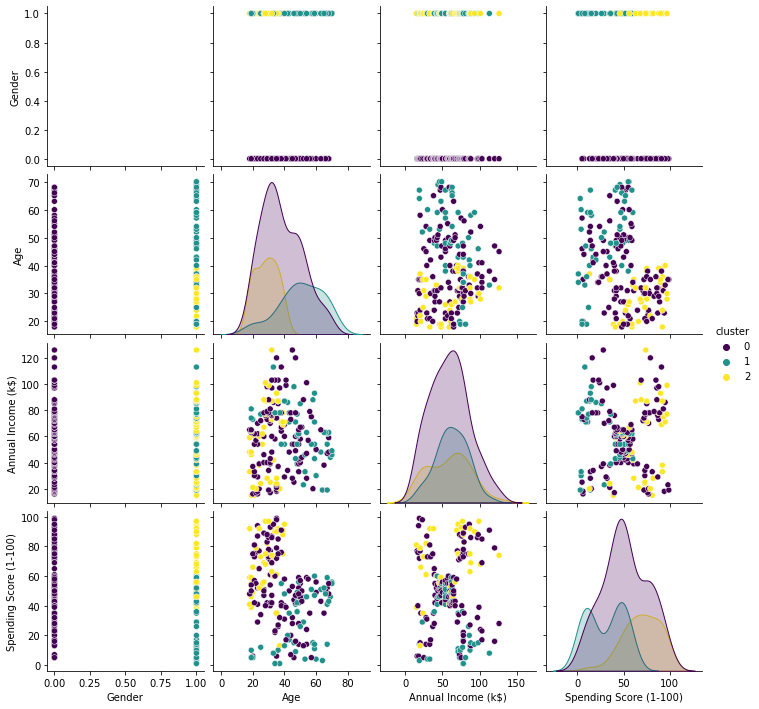

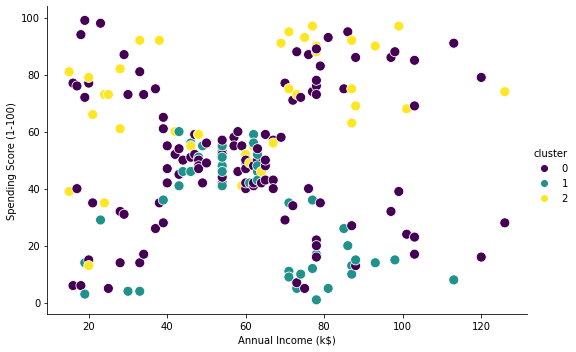

In [36]:
df['cluster']=y_hc
sns.pairplot(df,hue='cluster',palette='viridis')
sns.relplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue='cluster',palette='viridis',aspect=1.5,s=100)
df.drop('cluster',axis=1,inplace=True)

### DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [38]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(d)
distances, indices = nbrs.kneighbors(d)

Text(0, 0.5, 'min_distance\n')

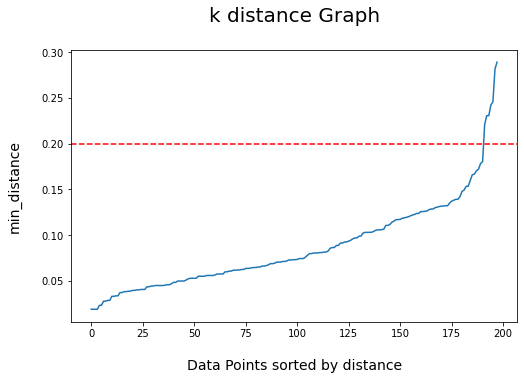

In [39]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('k distance Graph\n',fontsize=20)
plt.xlabel('\nData Points sorted by distance',fontsize=14)
plt.ylabel('min_distance\n',fontsize=14)

In [40]:
ep=0.2
m=5
dbscan=DBSCAN(eps=ep,min_samples=m)
y_dbscan=dbscan.fit_predict(d)

In [41]:
print('Silhouette score: {:.3f}'.format(silhouette_score(d,y_dbscan)))
print('Clusters:',np.unique(y_dbscan))

Silhouette score: 0.217
Clusters: [-1  0  1  2  3  4  5]


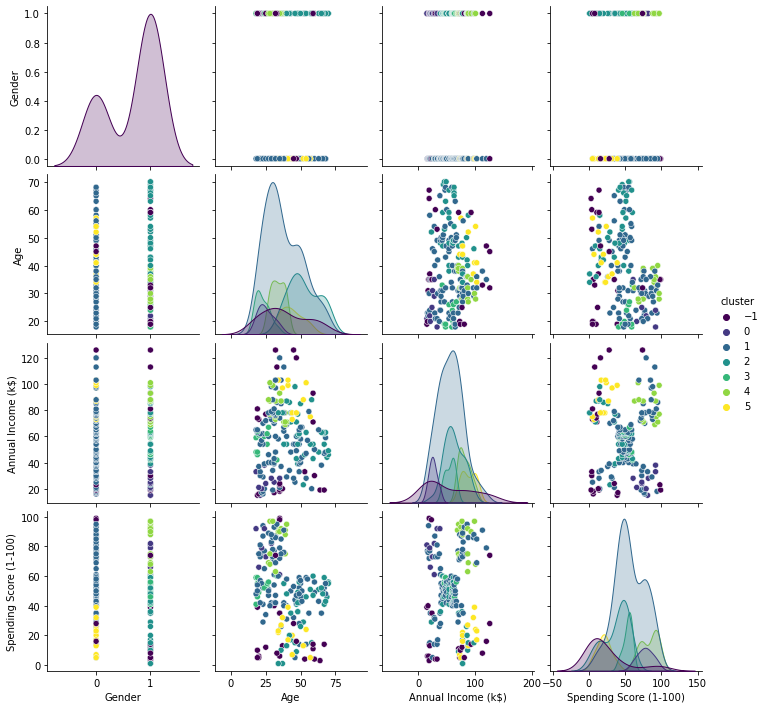

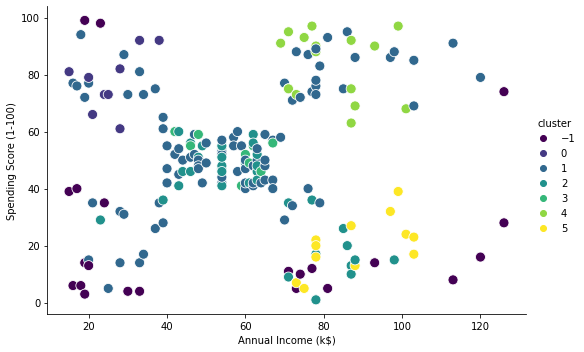

In [42]:
df['cluster']=y_dbscan
sns.pairplot(df,hue='cluster',palette='viridis')
sns.relplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue='cluster',palette='viridis',aspect=1.5,s=100)
df.drop('cluster',axis=1,inplace=True)

# Conclusion

In [43]:
print('Model'.ljust(30),'n_clusters'.ljust(15),'Silhouette score')
print('-'*65)
print('KMeans'.ljust(30),str(len(np.unique(y_kmeans))).ljust(15),round(silhouette_score(d,y_kmeans),3))
print('Agglomerative Heirarchial'.ljust(30),str(len(np.unique(y_hc))).ljust(15),round(silhouette_score(d,y_hc),3))
print('DBSCAN'.ljust(30),str(len(np.unique(y_dbscan)-1)).ljust(15),round(silhouette_score(d,y_dbscan),3))

Model                          n_clusters      Silhouette score
-----------------------------------------------------------------
KMeans                         10              0.436
Agglomerative Heirarchial      3               0.445
DBSCAN                         7               0.217


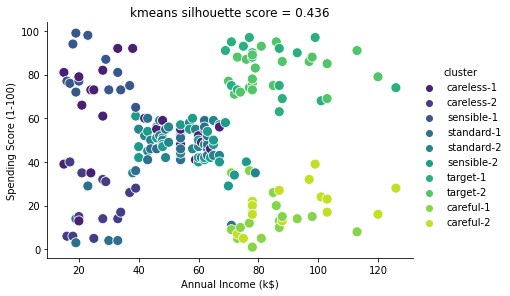

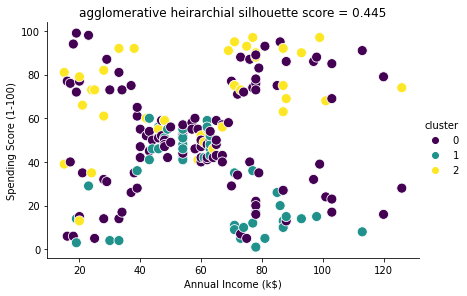

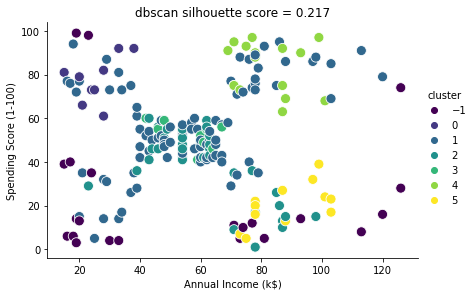

In [44]:
for i,j in zip([y_kmeans,y_hc,y_dbscan],['kmeans','agglomerative heirarchial','dbscan']):
    
    df['cluster']=i   
    
    if j=='kmeans':
        df['cluster'].replace({0:'sensible-1',1:'standard-1',2:'standard-2',3:'careless-2',
                       4:'careless-1',5:'target-1',6:'target-2',7:'careful-1',8:'careful-2',9:'sensible-2'},inplace=True)
        
    sns.relplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],
            hue='cluster',palette='viridis',height=4,aspect=1.5,s=100)
        
    plt.title(j+' '+'silhouette score = '+str(round(silhouette_score(d,i),3)))
    df.drop('cluster',axis=1,inplace=True)

#### Kmeans is the best clustering model for the given data
thought the silhouette_score is greater for agglomerative clustering, it soley can be the determinant of goodness of the model\
here due to the small size of data the silhouette_score is less for KMeans, otherwise for the most lucid clustering of KMeans it will have higher silhouette_score